In [35]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 10]
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, r2_score, confusion_matrix

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.pipeline import Pipeline

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import VotingRegressor

from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, r2_score, confusion_matrix

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.pipeline import Pipeline

# 회귀 트리 

- 결정 트리 기반의 DecisionTreeRegressor, 앙상블 기반의 GMM Regressor, Light GBM Regressor 등 
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측. 

### 회귀 Estimator 클래스	
Decision Tree Regressor	 <br>
Gradient Boosting Regressor <br>
XGBRegressor <br>
LGBMRegressor <br>


<img src='https://lucy-the-marketer.kr/wp-content/uploads/2021/03/Regression-tree-and-model-tree-example.png'>



<img src='https://t1.daumcdn.net/cfile/tistory/99D8E1385F3FC38109'>

## 보스턴 데이타셋 준비

```
CRIM: 지역별 범죄 발생률
ZN: 25,000평방피트를 초과하는 거주 지역의 비율
NDUS: 비상업 지역 넓이 비율
CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
NOX: 일산화질소 농도
RM: 거주할 수 있는 방 개수
AGE: 1940년 이전에 건축된 소유 주택의 비율
DIS: 5개 주요 고용센터까지의 가중 거리
RAD: 고속도로 접근 용이도
TAX: 10,000달러당 재산세율
PTRATIO: 지역의 교사와 학생 수 비율
B: 지역의 흑인 거주 비율
LSTAT: 하위 계층의 비율
MEDV: 본인 소유의 주택 가격(중앙값)
```

In [47]:
from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

boston_df['PRICE'] = boston.target
y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1,inplace=False)

C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

In [48]:
boston_df.columns # 컬럼 확인

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [49]:
boston_df.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
38,0.17505,0.0,5.96,0.0,0.499,5.966,30.2,3.8473,5.0,279.0,19.2,393.43,10.13,24.7
314,0.36920,0.0,9.90,0.0,0.544,6.567,87.3,3.6023,4.0,304.0,18.4,395.69,9.28,23.8
320,0.16760,0.0,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20,23.8


In [50]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [51]:
# Train Test 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, 
                                                    test_size=0.2, random_state=11)

In [52]:
# 선형회귀 
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
model_linear.score(X_test, y_test), r2_score(y_test, model_linear.predict(X_test))

(0.6859495577055552, 0.6859495577055552)

In [53]:
# 회기 결정 트리 
model_dtr = DecisionTreeRegressor(random_state=0)
model_dtr.fit(X_train, y_train)
model_dtr.score(X_test, y_test), r2_score(y_test, model_dtr.predict(X_test))

(0.6428055406780178, 0.6428055406780178)

In [54]:
# 랜덤포레스트회기
model_rfr = RandomForestRegressor(random_state=0, n_estimators=1000)
model_rfr.fit(X_train, y_train)
model_rfr.score(X_test, y_test), r2_score(y_test, model_rfr.predict(X_test))

(0.7843525680450454, 0.7843525680450454)

In [55]:
# 그라디언트 부스팅 회기용 
model_gbr = GradientBoostingRegressor(random_state=0, n_estimators=1000)
model_gbr.fit(X_train, y_train)
model_gbr.score(X_test, y_test), r2_score(y_test, model_gbr.predict(X_test))

(0.8136909369605254, 0.8136909369605254)

In [56]:
# XG부스팅 회기 
model_xgbr = XGBRegressor(random_state=0, n_estimators=1000)
model_xgbr.fit(X_train, y_train)
model_xgbr.score(X_test, y_test), r2_score(y_test, model_xgbr.predict(X_test))

(0.7677992543954298, 0.7677992543954298)

In [57]:
# 랜덤포레스트 중요 피처 속성 
model_rfr.feature_importances_

array([0.03592427, 0.00100529, 0.00586216, 0.00161559, 0.02618915,
       0.45807405, 0.01322262, 0.04890497, 0.0031572 , 0.01291997,
       0.01103585, 0.01121748, 0.37087141])

<AxesSubplot:>

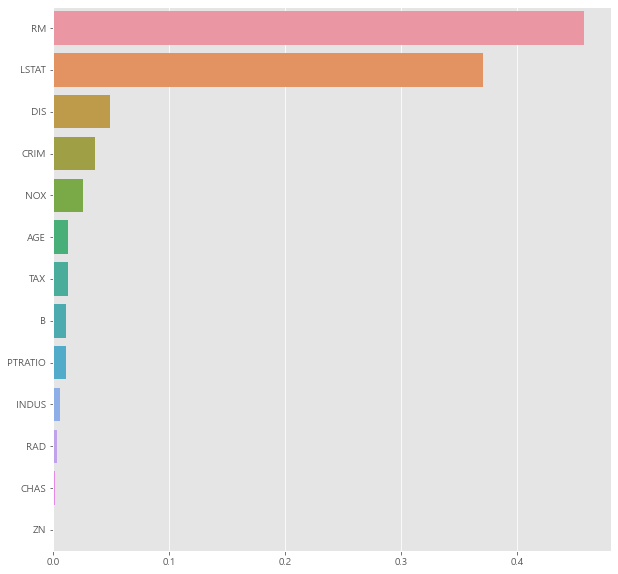

In [58]:
# 시각화 
feature_series = pd.Series(data=model_rfr.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

<AxesSubplot:>

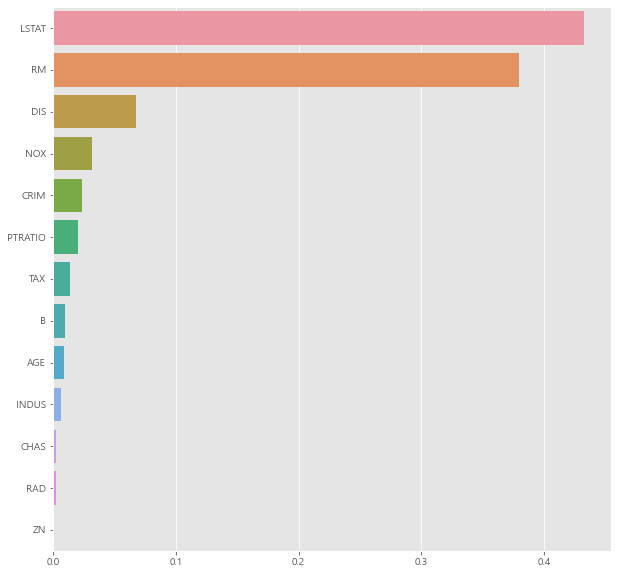

In [59]:
# 그라디언트 부스팅 피처 시각화 
feature_series = pd.Series(data=model_gbr.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

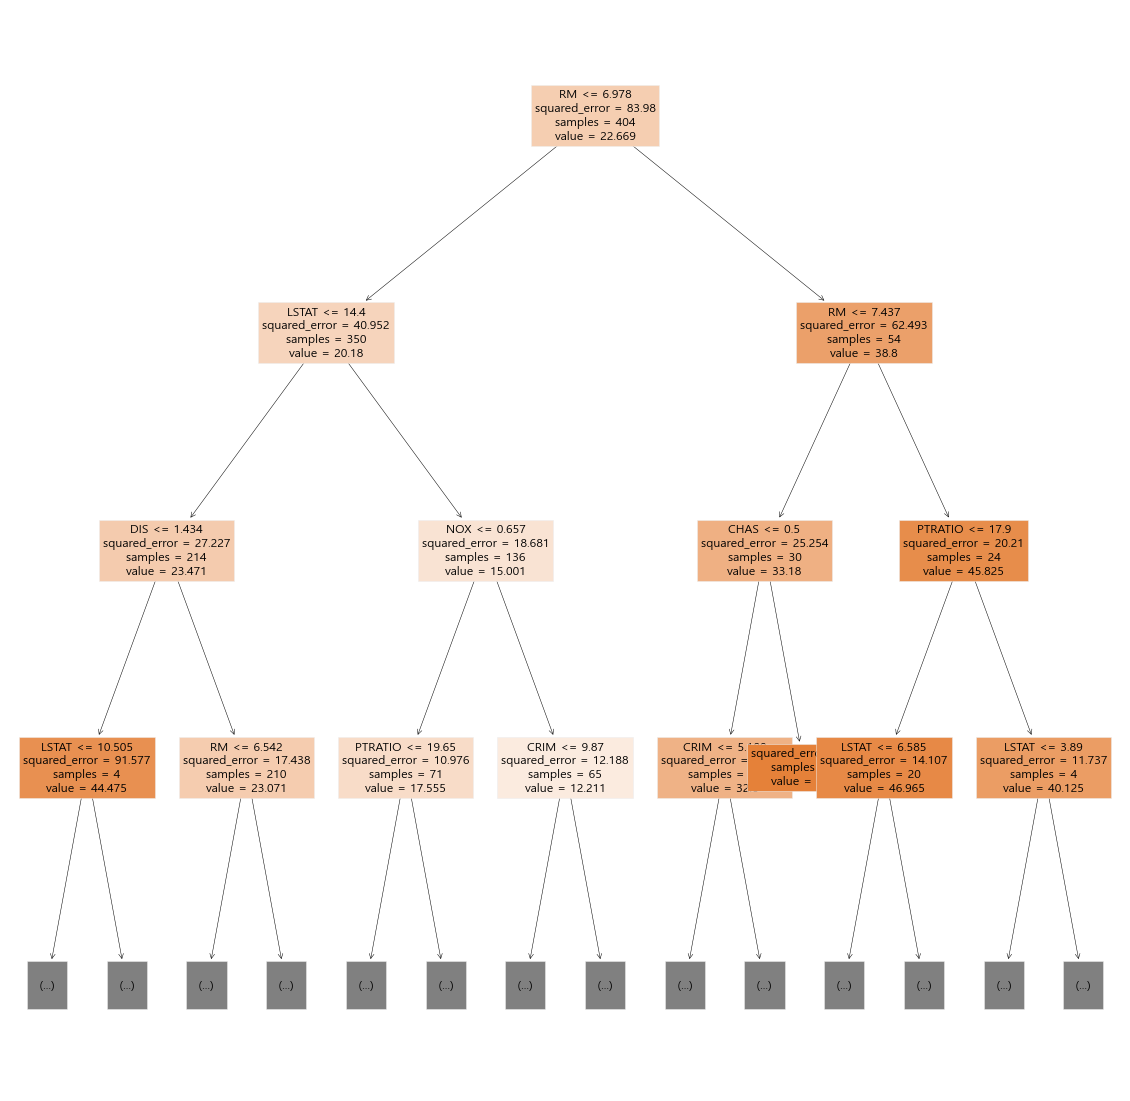

In [60]:
# 회기 트리 시각화 
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(model_dtr, max_depth=3, filled=True, feature_names=X_data.columns, fontsize=12)
plt.show()

In [61]:
model_rfr.get_params() # 파라미터 확인

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

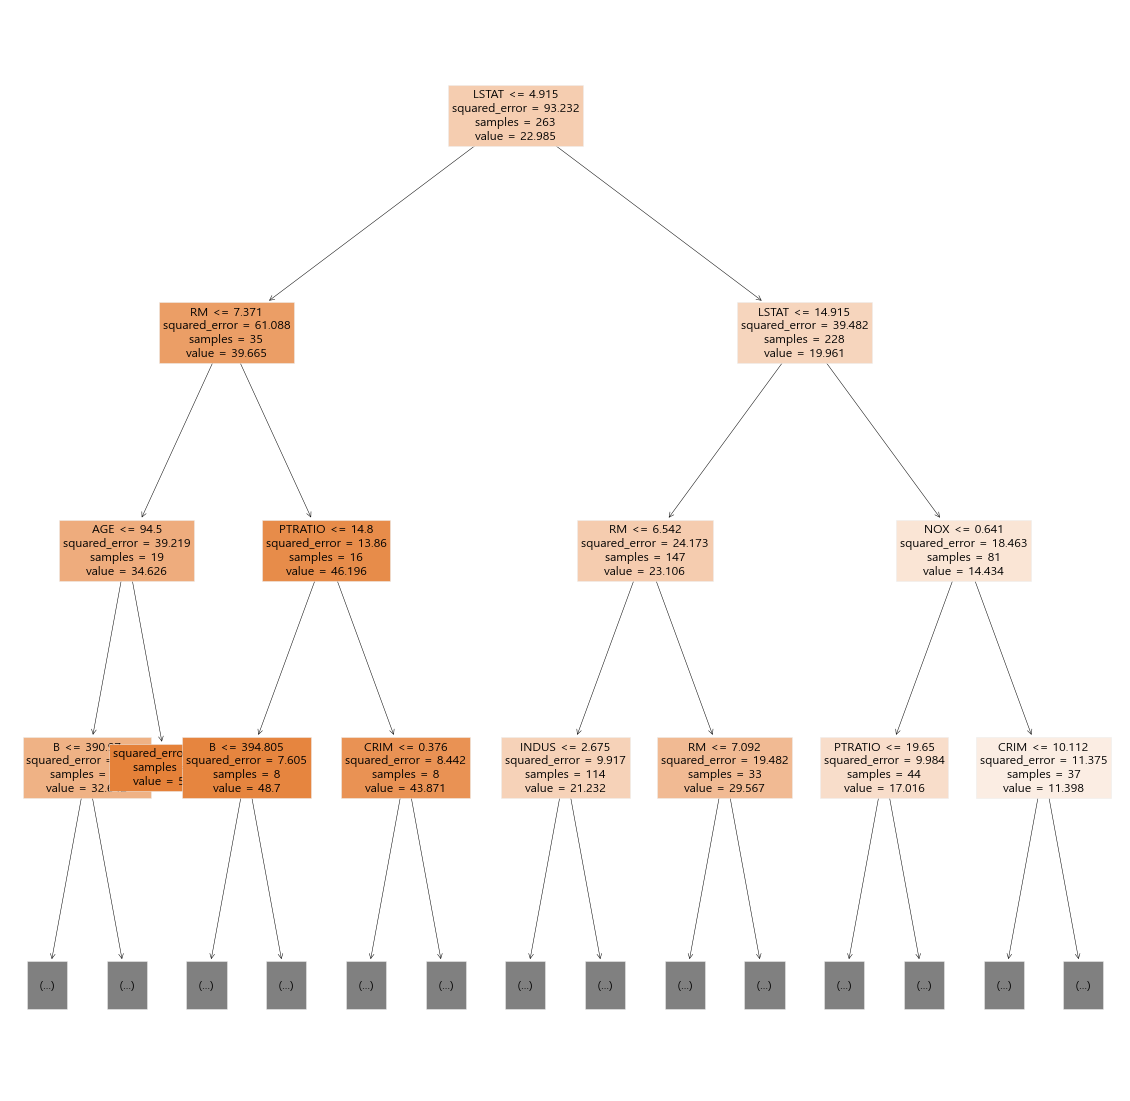

In [62]:
plt.figure(figsize=(20,20))
plot_tree(model_rfr[999], max_depth=3, filled=True, feature_names=X_data.columns, fontsize=12)
plt.show()

# 퀴즈 : 회기문제 
- 자전거 대여 수요 예측   
Linear Regressor, Lasso Regressor, Ridge , DecisionTree Regressor, RandomForestRegressor,   
GradientBoosting Regressor, XGB Regressor 다양한 모델을 구축하고 테스트하여라.   
각각의 평가지표점수를 이용하여 그래프로 시각화

```
datetime - hourly date + timestamp (날짜와 시간)
season - 1 = spring, 2 = summer, 3 = fall, 4 = winter (계절)
holiday - whether the day is considered a holiday (휴일)
workingday - whether the day is neither a weekend nor holiday (평일)
weather - 
1: Clear, Few clouds, Partly cloudy, Partly cloudy (맑은 날씨)
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (안개)
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (가벼운 눈, 비)
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (폭설, 폭우)
temp - temperature in Celsius (온도)
atemp - “feels like” temperature in Celsius (체감 온도)
humidity - relative humidity (상대 습도)
windspeed - wind speed (풍속)
casual - number of non-registered user rentals initiated (비회원 대여량)
registered - number of registered user rentals initiated (회원 대여량)
count - number of total rentals (총 대여량)

```

In [63]:
bike_df = pd.read_csv('data/bike_train.csv')
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)

# 회원, 비회원 대여량은 삭제 
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)


y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

X_features = pd.get_dummies(X_features, columns=['year','month','hour', 'holiday',
                                              'workingday','season','weather'])
X_features.head()


,temp,atemp,humidity,windspeed,day,year_2011,year_2012,month_1,month_2,month_3,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0


In [64]:
X_features.shape

(10886, 55)

In [65]:
X_features.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'day', 'year_2011',
       'year_2012', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'holiday_0',
       'holiday_1', 'workingday_0', 'workingday_1', 'season_1', 'season_2',
       'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3',
       'weather_4'],
      dtype='object')

In [66]:
X_features_numeric = X_features[['temp', 'atemp', 'humidity', 'windspeed']]
X_features_numeric.sample() 

,temp,atemp,humidity,windspeed
1959,24.6,31.06,49,8.9981


In [67]:
# 스케일링
scaler = StandardScaler()
scaler.fit(X_features_numeric)
X_features_numeric_scale = scaler.transform(X_features_numeric)
X_features_numeric_scale

array([[-1.33366069, -1.09273697,  0.99321305, -1.56775367],
       [-1.43890721, -1.18242083,  0.94124921, -1.56775367],
       [-1.43890721, -1.18242083,  0.94124921, -1.56775367],
       ...,
       [-0.80742813, -0.91395927, -0.04606385,  0.26970368],
       [-0.80742813, -0.73518157, -0.04606385, -0.83244247],
       [-0.91267464, -0.82486544,  0.21375537, -0.46560752]])

In [68]:
X_features['temp'] = X_features_numeric_scale[:, 0]
X_features['atemp'] = X_features_numeric_scale[:, 1]
X_features['humidity'] = X_features_numeric_scale[:, 2]
X_features['windspeed'] = X_features_numeric_scale[:, 3]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

In [70]:
# 선형 회귀 모델  
model_linear = LinearRegression()
model_lasso = Lasso(alpha=0.001)
model_ridge = Ridge(alpha=0.001)
model_dtr = DecisionTreeRegressor(random_state=0)
model_rfr = RandomForestRegressor(random_state=0, n_estimators=1000)
model_gbr = GradientBoostingRegressor(random_state=0, n_estimators=1000)
model_xgbr = XGBRegressor(random_state=0, n_estimators=1000)

In [71]:
regressor = [model_linear, model_lasso, model_ridge, model_dtr, model_rfr, model_gbr, model_xgbr]
score_list = []
for r in regressor:
    r.fit(X_train , y_train)
    print(r, r.score(X_test , y_test), mean_squared_error(y_test, r.predict(X_test)), np.sqrt(mean_squared_error(y_test, r.predict(X_test))))
    score_list.append([r.score(X_test , y_test), mean_squared_error(y_test, r.predict(X_test)), np.sqrt(mean_squared_error(y_test, r.predict(X_test)))])
    print()

LinearRegression() 0.6824845712532159 10311.273564803765 101.54444132892635



C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.191e+05, tolerance: 2.511e+04
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001) 0.6824879528940666 10311.16374644298 101.54390058710065

Ridge(alpha=0.001) 0.682484523986995 10311.27509976834 101.54444888701863

DecisionTreeRegressor(random_state=0) 0.81842577405507 5896.600122473974 76.78932297184274

RandomForestRegressor(n_estimators=1000, random_state=0) 0.9038515087583616 3122.4101453864055 55.87853027224683

GradientBoostingRegressor(n_estimators=1000, random_state=0) 0.9182297611561129 2655.478209378837 51.53133230743057

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, s

In [72]:
score_list = np.array(score_list)
score_list.shape

(7, 3)

XGBR            0.921427
GBR             0.918230
RandomForest    0.903852
Decision        0.818426
Lasso           0.682488
Linear          0.682485
Ridge           0.682485
dtype: float64


<AxesSubplot:>

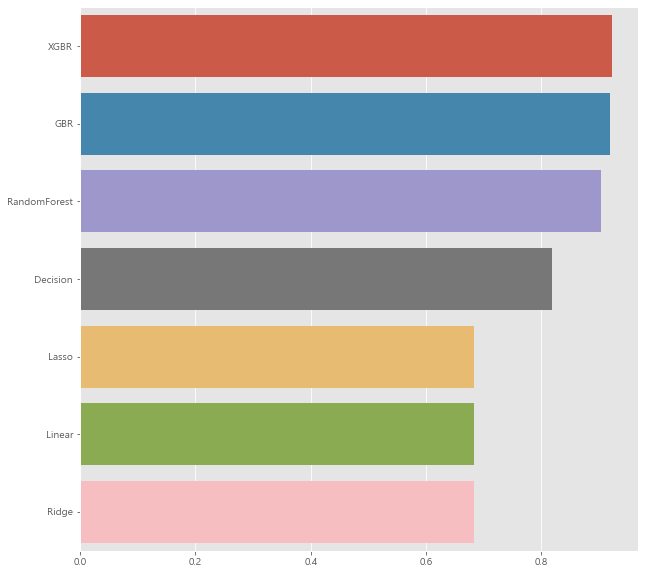

In [73]:
regressor_list = ['Linear', 'Lasso', 'Ridge', 'Decision', 'RandomForest', 'GBR', 'XGBR']
# score
score_series = pd.Series(data=score_list[:, 0], index=regressor_list )
score_series = score_series.sort_values(ascending=False)
print(score_series)
sns.barplot(x= score_series, y=score_series.index)

XGBR             2551.647436
GBR              2655.478209
RandomForest     3122.410145
Decision         5896.600122
Lasso           10311.163746
Linear          10311.273565
Ridge           10311.275100
dtype: float64


<AxesSubplot:>

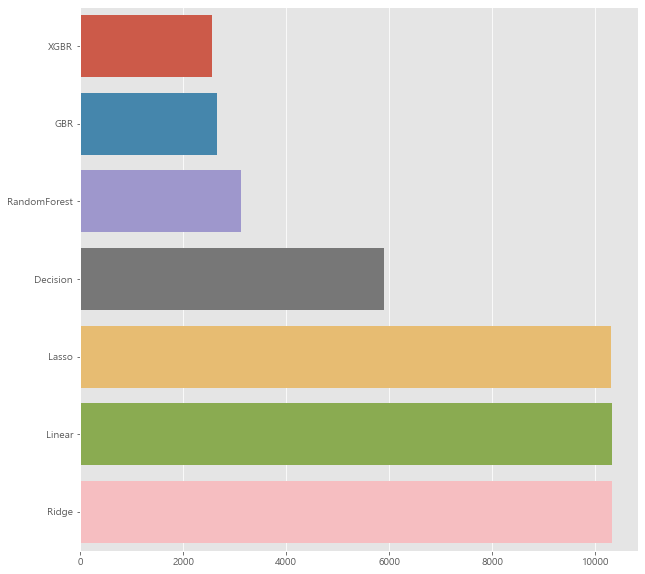

In [74]:
# MSE
score_series = pd.Series(data=score_list[:, 1], index=regressor_list )
score_series = score_series.sort_values()
print(score_series)
sns.barplot(x= score_series, y=score_series.index)

XGBR             50.513834
GBR              51.531332
RandomForest     55.878530
Decision         76.789323
Lasso           101.543901
Linear          101.544441
Ridge           101.544449
dtype: float64


<AxesSubplot:>

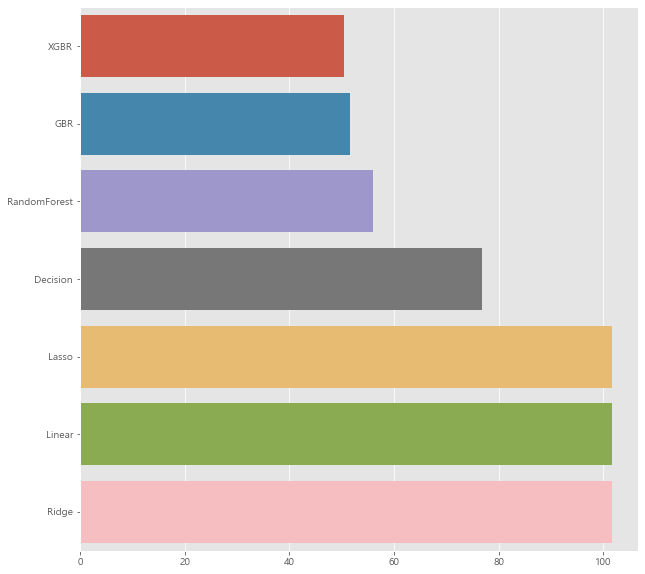

In [75]:
# RMSE
score_series = pd.Series(data=score_list[:, 2], index=regressor_list )
score_series = score_series.sort_values()
print(score_series)
sns.barplot(x= score_series, y=score_series.index)